# Problema y Objetivos
El objetivo de este análisis es comprender los factores que contribuyen a la enfermedad cardíaca y construir un modelo predictivo para clasificar si un paciente tiene o no la enfermedad. 
Nos enfocaremos en:

1. **Entender la estructura y contenido del dataset.**
2. **Realizar una limpieza y preprocesamiento de datos.**
3. **Explorar y analizar las relaciones entre las variables.**
4. **Construir y evaluar modelos de predicción.**

## Preguntas clave:
1. ¿Cuáles son los principales factores asociados con la presencia de enfermedad cardíaca?
2. ¿Existen patrones claros entre las variables que podamos utilizar para la predicción?
3. ¿Qué modelo ofrece el mejor rendimiento para este dataset?


---



## Importación de Librerías
Primero, importamos las librerías necesarias para el análisis, incluyendo:
- `KaggleApi` para descargar datos directamente de Kaggle.
- `pandas` y `numpy` para manejo y análisis de datos.
- `matplotlib` y `seaborn` para visualizaciones.
Además, configuramos los estilos de gráficos para que tengan un diseño uniforme y atractivo.



In [16]:
# Importar librerías
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de gráficos
sns.set_palette('viridis')
plt.style.use('ggplot')

print("Librerías importadas correctamente.")


Librerías importadas correctamente.


---

## Descarga del Dataset desde Kaggle
Utilizamos la API de Kaggle para descargar y descomprimir automáticamente el dataset **Heart Disease Data**. Esto nos asegura trabajar con datos actualizados directamente desde su fuente.

### Pasos:
1. Autenticamos la API de Kaggle con las credenciales configuradas previamente.
2. Descargamos y descomprimimos el archivo en una carpeta local.
3. Cargamos el dataset en un DataFrame de pandas y realizamos una inspección inicial:
   - Dimensiones del dataset.
   - Visualización de las primeras filas.


In [17]:
# Configurar API de Kaggle
api = KaggleApi()
api.authenticate()

# Descargar el dataset
dataset = "redwankarimsony/heart-disease-data"
path = "heart_disease_data"  # Carpeta destino
api.dataset_download_files(dataset, path=path, unzip=True)

# Leer el archivo CSV
uci_data = pd.read_csv(f"{path}/heart_disease_uci.csv")

# Mostrar las dimensiones y primeras filas del dataset
print("Dimensiones del dataset:")
print(uci_data.shape)

print("\nPrimeras filas del dataset:")
display(uci_data.head())



Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
Dimensiones del dataset:
(920, 16)

Primeras filas del dataset:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


---

## Descripción del Dataset: Heart Disease Dataset
Este dataset se centra en predecir la **presencia de enfermedad cardíaca** utilizando características médicas y demográficas. Los datos incluyen 920 observaciones y 16 variables.

### Enlace al Dataset:
- UCI Machine Learning Repository: https://archive.ics.uci.edu/dataset/45/heart+disease
- Kaggle: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

### Características del Dataset:
A continuación, se describen las columnas incluidas en el dataset:

| **Variable**       | **Descripción**                                                                                 |
|--------------------|-------------------------------------------------------------------------------------------------|
| **id**             | Identificador único para cada paciente.                                                         |
| **age**            | Edad del paciente en años (numérica).                                                           |
| **sex**            | Género del paciente (Masculino/Femenino).                                                       |
| **dataset**        | Identificador categórico de la fuente de datos (Cleveland, Hungary, VA Long Beach, Switzerland). |
| **cp**             | Tipo de dolor de pecho (categorías: angina típica, angina atípica, no anginal, asintomático).    |
| **trestbps**       | Presión arterial en reposo en mm Hg al ingreso al hospital (numérica continua).                 |
| **chol**           | Nivel de colesterol sérico en mg/dl (numérica continua).                                        |
| **fbs**            | Nivel de azúcar en sangre en ayunas (>120 mg/dl: 1 verdadero, 0 falso).                         |
| **restecg**        | Resultados del electrocardiograma en reposo (normal, anomalía ST-T, hipertrofia ventricular).    |
| **thalch**         | Frecuencia cardiaca máxima alcanzada durante una prueba de esfuerzo (numérica continua).         |
| **exang**          | Angina inducida por el ejercicio (binaria: Sí/No).                                              |
| **oldpeak**        | Depresión ST inducida por el ejercicio en relación con el descanso (numérica continua).          |
| **slope**          | Pendiente del segmento ST (categorías: plana, ascendente, descendente).                         |
| **ca**             | Número de vasos principales (0-3) coloreados por fluoroscopia (numérica).                       |
| **thal**           | Estado del corazón según la prueba de talio (normal, defecto fijo, defecto reversible).         |
| **num**            | Variable objetivo: presencia (1) o ausencia (0) de enfermedad cardíaca.                         |

### Observaciones iniciales:
1. Las variables incluyen tanto datos numéricos como categóricos.
2. La variable objetivo (**num**) indica la presencia o ausencia de enfermedad cardíaca.
3. Es probable que algunas variables requieran transformación o codificación antes de ser utilizadas en un modelo.
4. Existen varias categorías para las variables como **cp**, **restecg**, y **slope**, que pueden proporcionar información importante.


---

## Inspección Inicial del Dataset
En esta etapa, exploraremos:
1. Los tipos de datos y su distribución.
2. Si hay valores faltantes y cuántos hay en cada columna.
3. Estadísticas descriptivas para las variables numéricas.
4. La distribución de valores únicos en variables categóricas.



---

### Paso 3.1: Información General del Dataset
**Objetivo**:
- Inspeccionar la estructura del dataset para entender la cantidad de datos, tipos de columnas y posibles valores faltantes.
- Identificar qué columnas podrían requerir transformación o limpieza más adelante.




In [28]:
# Información general del dataset
print("Información general del dataset:")
uci_data.info()


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


**Resultados del Paso 3.1**:
1. **Dimensiones**: El dataset contiene **920 filas** y **16 columnas**.
2. **Tipos de datos**:
   - Numéricos (float64/int64): `age`, `trestbps`, `chol`, `thalch`, `oldpeak`, `ca`, `num`, `id`.
   - Categóricos (object): `sex`, `dataset`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `thal`.
3. **Valores no nulos**:
   - Algunas columnas tienen valores faltantes:
     - `trestbps`: 59 valores nulos.
     - `chol`: 30 valores nulos.
     - `fbs`: 90 valores nulos.
     - `restecg`: 2 valores nulos.
     - `thalch`: 55 valores nulos.
     - `exang`: 55 valores nulos.
     - `oldpeak`: 62 valores nulos.
     - `slope`: 309 valores nulos.
     - `ca`: 611 valores nulos.
     - `thal`: 486 valores nulos.
4. **Memoria utilizada**: 115.1 KB.

**Observaciones**:
- Las columnas `ca` y `thal` tienen una gran cantidad de valores faltantes y requerirán atención especial.
- La columna `num` parece ser nuestra variable objetivo y no tiene valores faltantes.


### Paso 3.2: Análisis de Valores Nulos

**Objetivo**:
- Analizar la cantidad y proporción de valores faltantes por columna para decidir cómo manejarlos en el proceso de limpieza.

In [29]:
# Porcentaje de valores nulos por columna
print("Porcentaje de valores nulos por columna:")
missing_percentage = (uci_data.isnull().sum() / len(uci_data)) * 100
display(missing_percentage.sort_values(ascending=False))


Porcentaje de valores nulos por columna:


ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
trestbps     6.413043
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
num          0.000000
dtype: float64

**Resultados del Paso 3.2**:
1. Columnas con alto porcentaje de valores nulos:
   - `ca`: 66.41% de valores nulos.
   - `thal`: 52.83% de valores nulos.
   - `slope`: 33.59% de valores nulos.

2. Columnas con un porcentaje moderado de valores nulos:
   - `fbs`: 9.78%.
   - `oldpeak`: 6.74%.
   - `trestbps`: 6.41%.
   - `thalch`: 5.98%.
   - `exang`: 5.98%.
   - `chol`: 3.26%.

3. Columnas casi completas (menos del 1% de nulos):
   - `restecg`: 0.22%.

4. Columnas sin valores nulos:
   - `id`, `age`, `sex`, `dataset`, `cp`, `num`.

**Observaciones**:
- Las columnas `ca`, `thal`, y `slope` tienen un porcentaje elevado de valores faltantes y podrían requerir:
  - Imputación de valores.
  - Eliminación si su impacto en el análisis es limitado.
- Columnas con pocos valores nulos (`restecg`, `chol`, etc.) pueden manejarse con imputaciones sencillas.


---

### Paso 3.3: Visualización de Distribuciones

**Objetivo**:
- Visualizar las distribuciones de las variables numéricas para identificar:
  1. Posibles valores atípicos (outliers).
  2. Sesgos en las distribuciones.
  3. Variables que puedan necesitar transformación (e.g., normalización o estandarización).


Distribuciones de las variables numéricas:


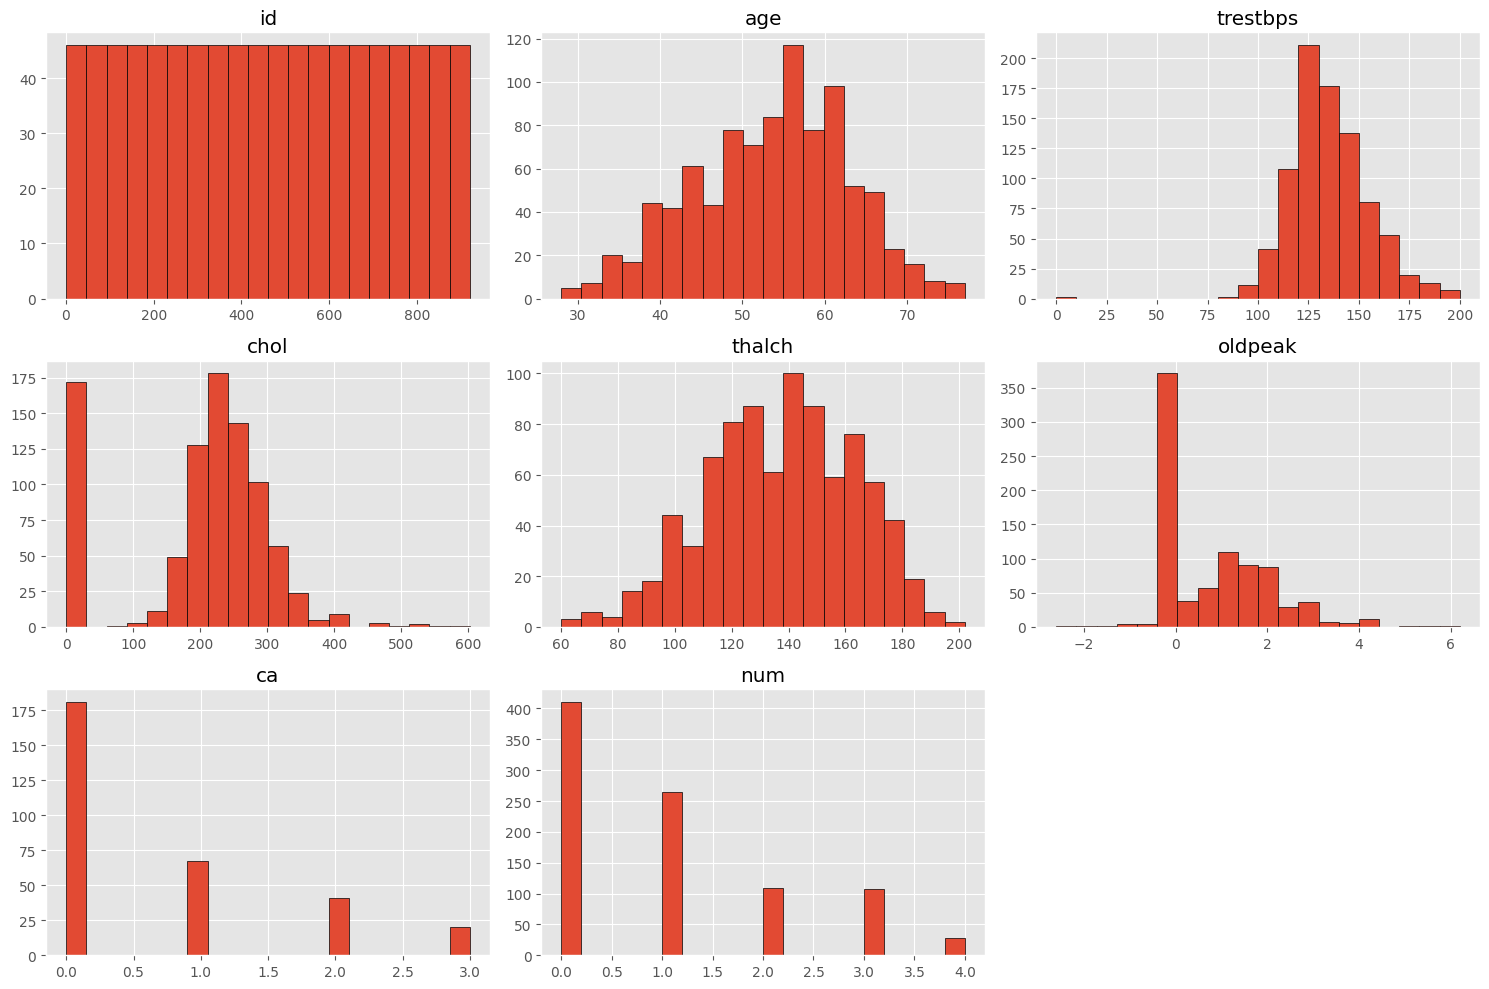

In [30]:
# Seleccionar columnas numéricas
numeric_cols = uci_data.select_dtypes(include=['float64', 'int64']).columns

# Visualizar distribuciones de las variables numéricas
print("Distribuciones de las variables numéricas:")
uci_data[numeric_cols].hist(figsize=(15, 10), bins=20, edgecolor="black")
plt.tight_layout()
plt.show()


**Resultados del Paso 3.3**:
1. Identificaremos variables con distribuciones sesgadas o que presentan valores extremos.
2. Esto nos ayudará a decidir si debemos transformar, normalizar o manejar outliers antes del modelado.


---

**Resultados del Paso 3.3**:
1. **Variables con distribuciones aparentemente normales:**
   - `age`: Distribución parecida a una normal, centrada alrededor de los 50-60 años.
   - `thalch`: Frecuencia cardiaca máxima también muestra una distribución mas o menos simétrica.

2. **Variables con distribuciones sesgadas:**
   - `chol`: Distribución sesgada a la derecha, con algunos valores altos fuera del rango típico.
   - `oldpeak`: Altamente sesgada hacia valores bajos (cercanos a 0), probablemente necesita una transformación.
   - `ca`: Distribución discreta con la mayoría de los valores en 0 y pocos pacientes con valores mayores.

3. **Valores extremos:**
   - `chol` y `oldpeak` podrían tener outliers que deberíamos investigar en más detalle.
   - `trestbps` tiene una distribución bastante concentrada entre 120-140 mmHg, pero hay valores extremos.

4. **Variable objetivo (`num`):**
   - Distribución desigual entre los niveles. La mayoría de los pacientes no tienen enfermedad cardíaca o presentan un diagnóstico moderado (valores bajos de `num`).
   - Esto sugiere que podríamos simplificar `num` en una clasificación binaria (enfermedad/no enfermedad) más adelante.

**Próximos pasos:**
1. Identificar y manejar outliers en variables clave (`chol`, `oldpeak`).
2. Evaluar si es necesario transformar variables sesgadas (`oldpeak`, `chol`) para mejorar su distribución.
3. Analizar la relación de las variables con la variable objetivo (`num`) para detectar patrones.


---

### Paso 3.4: Identificación de Outliers

**Objetivo**:
- Identificar valores atípicos en las variables `chol` y `oldpeak` mediante diagramas de caja (boxplots).
- Los outliers pueden distorsionar los análisis estadísticos y afectar el rendimiento de los modelos predictivos.


1. Identificaremos los valores extremos en las variables y cuántos están fuera de los rangos intercuartiles.
2. Esto nos permitirá decidir:
   - Si eliminamos los outliers.
   - Si aplicamos transformaciones para reducir su impacto.

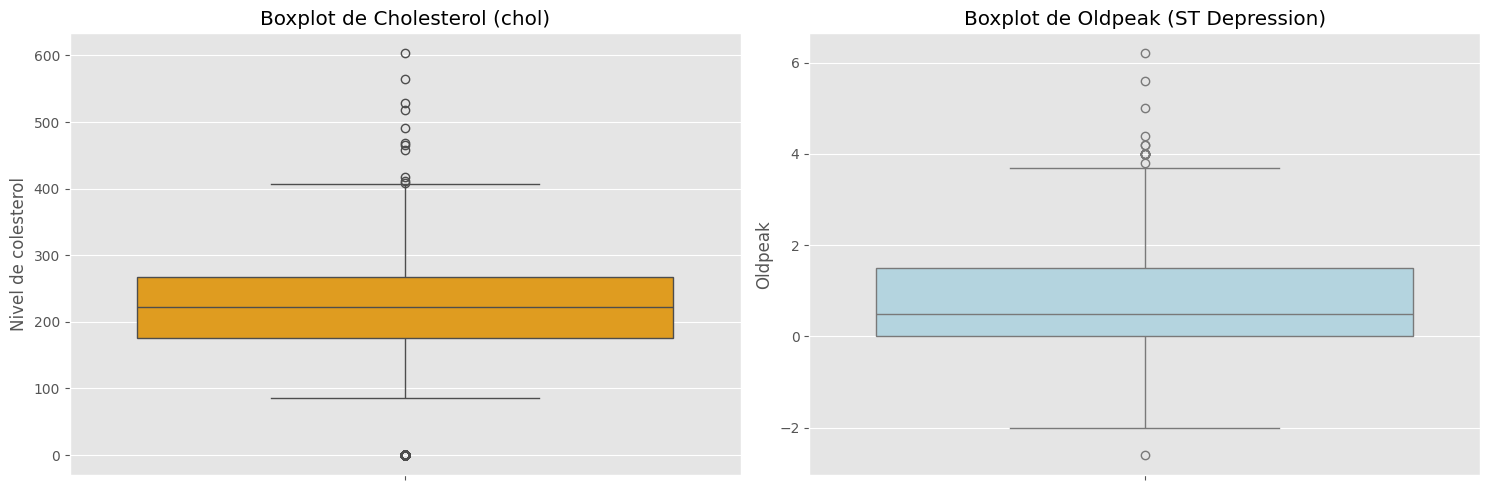

In [31]:
# Boxplots para identificar outliers en 'chol' y 'oldpeak'
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Colesterol (chol)
sns.boxplot(ax=axes[0], y=uci_data['chol'], color='orange')
axes[0].set_title('Boxplot de Cholesterol (chol)')
axes[0].set_ylabel('Nivel de colesterol')

# Depresión ST (oldpeak)
sns.boxplot(ax=axes[1], y=uci_data['oldpeak'], color='lightblue')
axes[1].set_title('Boxplot de Oldpeak (ST Depression)')
axes[1].set_ylabel('Oldpeak')

plt.tight_layout()
plt.show()


**Resultados del Paso 3.4**:
1. **Colesterol (chol):**
   - Hay valores extremos por encima de 400 mg/dl, llegando incluso a 600 mg/dl.
   - Existe un posible valor atípico por debajo de 100 mg/dl.
   - La mayoría de los datos están dentro de un rango típico (alrededor de 200-300 mg/dl).

2. **Depresión ST (oldpeak):**
   - Algunos valores extremos están por encima de 4.0.
   - La distribución está fuertemente sesgada hacia valores bajos (0-1).
   - Podría ser útil aplicar una transformación logarítmica para normalizar la distribución.

**Decisiones:**
- Verificaremos si los valores extremos están relacionados con errores de medición o si representan casos clínicos válidos.
- Evaluaremos eliminar o tratar los outliers utilizando el rango intercuartil (IQR) como criterio.



### Teoría: ¿Por qué considerar una transformación logarítmica para `oldpeak`?

#### Observación inicial de la distribución
- En el boxplot de `oldpeak`, se observa una distribución **altamente sesgada** hacia valores bajos (la mayoría de los datos están cerca de 0 o 1).
- Esta concentración en un extremo y la presencia de valores altos (outliers) sugieren que la variable tiene una distribución sesgada.

#### Problemas con distribuciones sesgadas
- Las distribuciones sesgadas pueden dificultar los análisis estadísticos y el rendimiento de los modelos de machine learning porque:
  - Muchos algoritmos (como regresiones o redes neuronales) asumen que las variables siguen una distribución más simétrica (como una normal).
  - Los valores extremos (outliers) pueden distorsionar los resultados y tener un impacto desproporcionado en los análisis.

#### Teoría detrás de la transformación logarítmica
- Las transformaciones logarítmicas se utilizan para:
  1. Reducir la amplitud de los datos (comprimir los valores más altos).
  2. Hacer que la distribución sea más simétrica.
  3. Reducir el impacto de los valores extremos (outliers).

Matemáticamente:
- Dada una variable con valores `x = [0.1, 1, 10, 100]`, la transformación `log(x)` ajusta la escala a `[-1, 0, 1, 2]`.
- Este ajuste comprime los valores grandes (por ejemplo, 100) y expande los valores pequeños (por ejemplo, 0.1).

#### Evidencia en este caso (`oldpeak`)
- La mayoría de los valores de `oldpeak` están entre 0 y 1.
- Los valores extremos (>4.0) son mucho más grandes que el resto, distorsionando la escala.
- Al aplicar una transformación logarítmica, reducimos esta diferencia, haciendo que los valores sean más comparables y mejor interpretables.

#### Consideraciones para la transformación logarítmica
- Si los datos contienen ceros, usamos `log(x + 1)` para evitar problemas (ya que `log(0)` no está definido).
- Otras transformaciones como raíz cuadrada o Box-Cox también podrían ayudar si la transformación logarítmica no es suficiente.

#### Conclusión
La transformación logarítmica puede ser útil para:
1. Normalizar la distribución de `oldpeak`.
2. Reducir el impacto de los valores extremos.
3. Mejorar el rendimiento de modelos predictivos o análisis estadísticos que dependen de distribuciones simétricas.


---

Paso 3.5: Identificación de Outliers usando IQR


**Objetivo**:
- Utilizar el método del **rango intercuartil (IQR)** para identificar los outliers en las variables `chol` y `oldpeak`.
- Esto nos permite definir límites claros para detectar valores extremos:
  - **Límite inferior**: `Q1 - 1.5 * IQR`
  - **Límite superior**: `Q3 + 1.5 * IQR`
- Decidiremos si eliminamos estos outliers o si los tratamos de otra manera.




In [ ]:
# Calcular límites del rango intercuartil (IQR) para 'chol' y 'oldpeak'
for col in ['chol', 'oldpeak']:
    Q1 = uci_data[col].quantile(0.25)  # Primer cuartil (25%)
    Q3 = uci_data[col].quantile(0.75)  # Tercer cuartil (75%)
    IQR = Q3 - Q1  # Rango intercuartil

    lower_bound = Q1 - 1.5 * IQR  # Límite inferior
    upper_bound = Q3 + 1.5 * IQR  # Límite superior

    print(f"{col} - IQR: {IQR:.2f}, Límite Inferior: {lower_bound:.2f}, Límite Superior: {upper_bound:.2f}")

    # Filtrar outliers
    outliers = uci_data[(uci_data[col] < lower_bound) | (uci_data[col] > upper_bound)]
    print(f"Outliers detectados en {col}: {len(outliers)}")


chol - IQR: 93.00, Lower Bound: 35.50, Upper Bound: 407.50
Outliers detectados en chol: 183
oldpeak - IQR: 1.50, Lower Bound: -2.25, Upper Bound: 3.75
Outliers detectados en oldpeak: 16
